<a href="https://colab.research.google.com/github/tanpharamut/data_viz/blob/main/Chapter8_Timeline_Chart_Candlestick_Chart_CSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# บทที่ 8 การแสดงผลข้อมูลเชิงเวลาและอื่นๆ
### - แนวคิดและการสร้างแผนภูมิอธิบายข้อมูลเชิงเวลา เช่น Timeline Chart, Candlestick Chart, Cross spectral density (CSD) เป็นต้น

### Timeline Chart

In [ ]:
#import
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

In [ ]:
# กำหนดข้อมูลใน list เก็บไว้ในตัวแปร
names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
          'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
          'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
          'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
          '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
          '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
          '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
          '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
          '2014-10-26', '2014-10-18', '2014-08-26']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

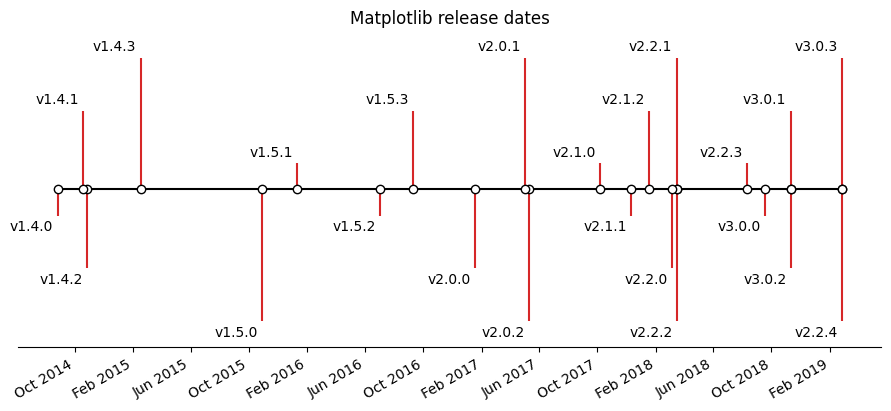

In [ ]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

###Candlestick Chart

In [ ]:
#import
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

In [ ]:
df

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing
...,...,...,...,...,...,...,...,...,...,...,...
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,114.820798,125.205166,135.589534,Increasing
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,115.175718,125.953499,136.731280,Increasing
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

In [ ]:
fig.show()

###Candlestick without Rangeslider

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close'])
                     ])

In [ ]:
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

###Custom Candlestick Colors

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['AAPL.Open'], high=df['AAPL.High'],
    low=df['AAPL.Low'], close=df['AAPL.Close'],
    increasing_line_color= 'cyan', decreasing_line_color= 'gray'
)])

In [ ]:
fig.show()

###Simple Example with datetime Objects

In [ ]:
open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])

In [ ]:
fig.show()

###Cross spectral density (CSD)

In [ ]:
#import
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
# Number of samples and time array creation
num_samples = 1000
time = np.linspace(0, 1, num_samples)

# Generating P wave, QRS complex, and T wave for ECG signal
p_wave = np.sin(2 * np.pi * 2 * time)
qrs_complex = (
    + 0.2 * np.sin(2 * np.pi * 10 * time)
    + 0.3 * np.sin(2 * np.pi * 20 * time)
    + 0.1 * np.sin(2 * np.pi * 30 * time)
)
t_wave = np.sin(2 * np.pi * 1 * time)
ecg_signal = p_wave + qrs_complex + t_wave

# Generating brain signal (EEG-BETA) and adding random movement
brain_signal = np.cos(2 * np.pi * 20 * time)
random_movement = np.random.normal(loc=0, scale=0.1, size=num_samples)
brain_signal += random_movement

# Calculating Cross Spectral Density (CSD) between ECG and EEG signals
frequencies, csd = signal.csd(ecg_signal, brain_signal, fs=1.0, nperseg=100)

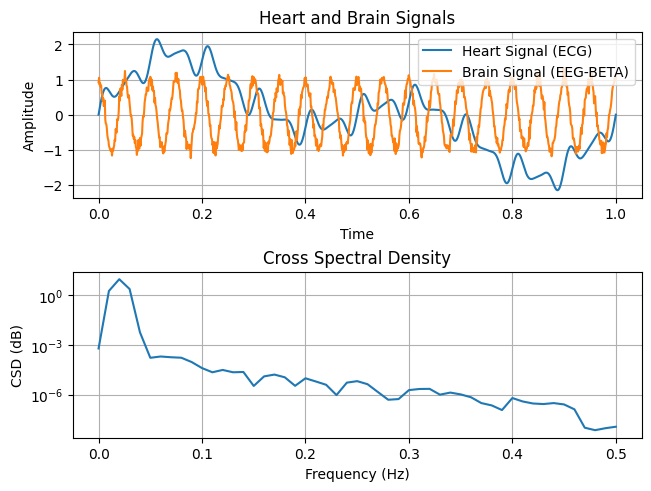

In [ ]:
# Plotting ECG, EEG-BETA signal and Cross Spectral Density (CSD)
fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

# Plotting ECG, EEG-BETA signal
ax1.plot(time, ecg_signal, label='Heart Signal (ECG)')
ax1.plot(time, brain_signal, label='Brain Signal (EEG-BETA)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.set_title('Heart and Brain Signals')
ax1.legend()
ax1.grid(True)

# Plotting Cross Spectral Density (CSD)
ax2.semilogy(frequencies, np.abs(csd))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('CSD (dB)')
ax2.set_title('Cross Spectral Density')
ax2.grid(True)

plt.show()